In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# 보스턴 집 값 예제 데이터 가져오기
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [24]:
x = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIDO", "B", "LSTAT"])

y = pd.DataFrame(target, columns=["PRICE"])
# "B"는 흑인 거주 비율이어서 예제 데이터에서 빠짐

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [33]:
model = Sequential()

In [34]:
# 데이터의 수에 비해 레이어가 너무 많으면 과적합

# input layer
model.add(Dense(32, activation="relu", input_shape=(x.columns.size, )))

# hidden later 
# (64개 : 원하는 수치를 쓰면 됨)
# (32개 : *** 이전 레이어의 아웃풋 레이어와 같음)
model.add(Dense(64, activation="relu", input_shape=(32, )))

# (32개 : 원하는 수치를 쓰면 됨)
# (64개 : *** 이전 레이어의 아웃풋 레이어와 같음)
model.add(Dense(32, activation="relu", input_shape=(64, )))

# output layer
# 1 : 출력될 개수가 하나라서(linear라서 y값이 하나여야 하니까)
# activation="linear" 그대로 linear로 y값 내보내야 하니까
model.add(Dense(1, activation="linear"))

In [35]:
# 모델의 나머지 추가 (옵티마이저랑 로스)

model.compile(optimizer="adam", loss="mse")

In [36]:
result = model.fit(x_train, y_train, batch_size=10, epochs=100, validation_split=0.3)
# validation_split=0.3 : 30% 검증용으로 다시 사용할 것

Epoch 1/100


25/25 [==============================] - 1s 9ms/step - loss: 1050.5785 - val_loss: 88.9622
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 86.7985 - val_loss: 78.6176
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 60.0266 - val_loss: 77.5905
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 56.1342 - val_loss: 72.6795
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 56.6375 - val_loss: 72.2170
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 55.4486 - val_loss: 71.0633
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 54.1824 - val_loss: 70.6611
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 54.3893 - val_loss: 70.7681
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 56.0930 - val_loss: 73.7598
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 52.9910 - val_loss: 69.1797

In [31]:
model.evaluate(x_test, y_test)

# 이 수치가 작으면 작을수록 좋음

5/5 [==============================] - 0s 2ms/step - loss: 20.2541


20.254064559936523

In [37]:
result.history

{'loss': [1050.5784912109375,
  86.79852294921875,
  60.026573181152344,
  56.13422775268555,
  56.63751220703125,
  55.44862747192383,
  54.182373046875,
  54.3892822265625,
  56.092987060546875,
  52.99095153808594,
  55.7308349609375,
  52.590003967285156,
  50.665550231933594,
  52.133121490478516,
  51.04528045654297,
  50.35405731201172,
  52.3181266784668,
  48.17268371582031,
  46.11002731323242,
  51.20058059692383,
  46.38953399658203,
  49.36833190917969,
  45.02535629272461,
  56.32291793823242,
  47.42922592163086,
  56.79671859741211,
  47.75011444091797,
  41.86944580078125,
  40.67607498168945,
  41.093013763427734,
  42.0187873840332,
  41.37366485595703,
  40.25309753417969,
  35.867801666259766,
  36.145198822021484,
  36.36013412475586,
  38.344276428222656,
  35.9223747253418,
  34.3341178894043,
  39.93238067626953,
  36.5880241394043,
  35.52614974975586,
  36.6243896484375,
  34.501258850097656,
  31.558876037597656,
  39.19869613647461,
  30.876062393188477,
  

<function matplotlib.pyplot.show(close=None, block=None)>

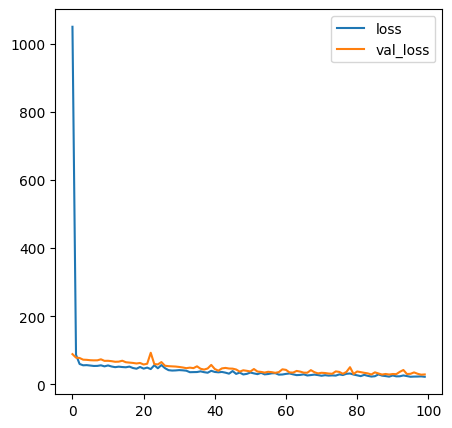

In [38]:
plt.figure(figsize=(5, 5))

plt.plot(result.history["loss"], label="loss")
plt.plot(result.history["val_loss"], label="val_loss")

plt.legend()
plt.show